# LGMVIP DATA SCIENCE INTERN TASK-2
# AUTHOR: ANUSHKA
## EXPLORATORY DATA ANALYSIS ON DATASET-TERRORISM
## LEVEL-INERMEDIATE

### IMPORTING NECESSARY LIBRARIES

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [103]:
gtr= pd.read_csv(r"C:\Users\Prachi\Documents\globalterrorism.csv",encoding='latin1')
gtr.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### READING THE DATASET

In [104]:
gtr.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [105]:
gtr.rename(columns={"iyear":"year","imonth":"month","iday":"day","gname":"group","country_txt":"Country","region_txt":"Region","provstate":"state","city":"City","latitude":"Latitude","longitude":"Longitude","summary":"Summary","attacktype1_txt":"Attacktype", "weaptype1_txt":"Weaptype","nkill":"kill","nwound":"wound","motive":"motive"},inplace=True)

In [106]:
gtr=gtr[['year','month','day','group','Country','Region','state','City','Latitude',"Longitude","Summary","Attacktype","Weaptype","kill","wound","motive"]]

In [107]:
gtr.head()

,year,month,day,group,Country,Region,state,City,Latitude,Longitude,Summary,Attacktype,Weaptype,kill,wound,motive
0,1970,7,2,MANO-D,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Unknown,1.0,0.0,NaN
1,1970,0,0,23rd of September Communist League,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Unknown,0.0,0.0,NaN
2,1970,1,0,Unknown,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,Assassination,Unknown,1.0,0.0,NaN
3,1970,1,0,Unknown,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,Bombing/Explosion,Explosives,NaN,NaN,NaN
4,1970,1,0,Unknown,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,Facility/Infrastructure Attack,Incendiary,NaN,NaN,NaN


### EXPLORATORY DATA ANALYSIS 

In [108]:
gtr.shape

(181691, 16)

In [109]:
gtr.isnull().sum()

year               0
month              0
day                0
group              0
Country            0
Region             0
state            421
City             434
Latitude        4556
Longitude       4557
Summary        66129
Attacktype         0
Weaptype           0
kill           10313
wound          16311
motive        131130
dtype: int64

### DROP THE COLUMNS

In [110]:
gtr.drop(['motive','Summary','Latitude','Longitude'],axis=1,inplace=True)

In [111]:
gtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        181691 non-null  int64  
 1   month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   group       181691 non-null  object 
 4   Country     181691 non-null  object 
 5   Region      181691 non-null  object 
 6   state       181270 non-null  object 
 7   City        181257 non-null  object 
 8   Attacktype  181691 non-null  object 
 9   Weaptype    181691 non-null  object 
 10  kill        171378 non-null  float64
 11  wound       165380 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 16.6+ MB


In [112]:
gtr.describe()

,year,month,day,kill,wound
count,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,2.403272,3.167668
std,13.259430,3.388303,8.814045,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


### VISUALIZATION

In [113]:
attack=gtr.Country.value_counts()[:5]
attack

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

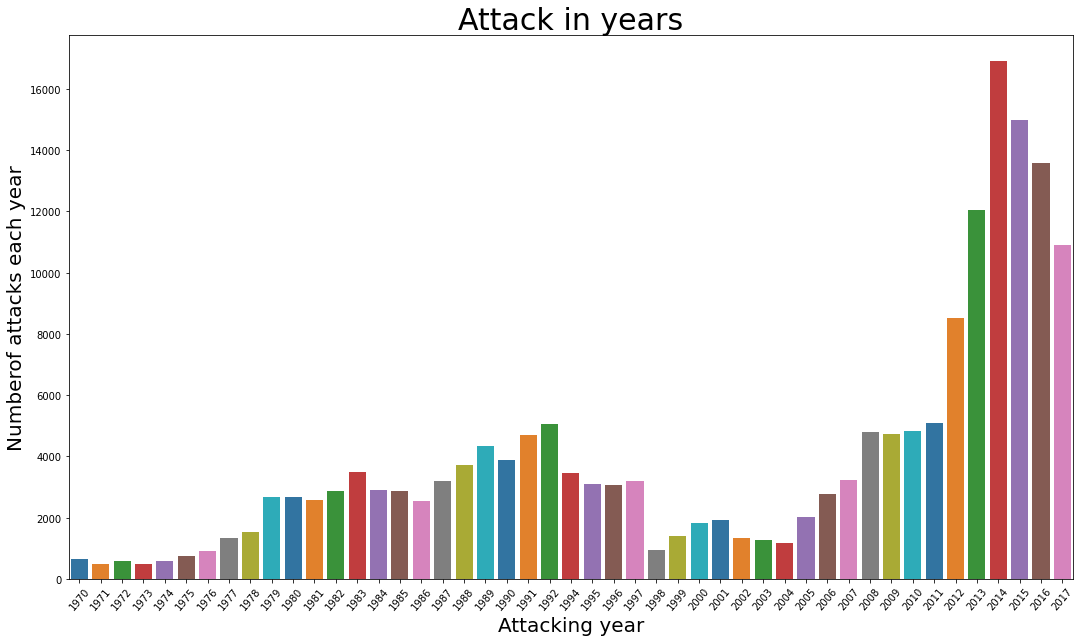

In [117]:
year=gtr['year'].unique()
years_count=gtr['year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(18,10))
sns.barplot(x=year,
            y=years_count,
         palette="tab10"  )
plt.xticks(rotation=50)
plt.xlabel('Attacking year',fontsize=20)
plt.ylabel('Numberof attacks each year',fontsize=20)
plt.title('Attack in years',fontsize=30)
plt.show()

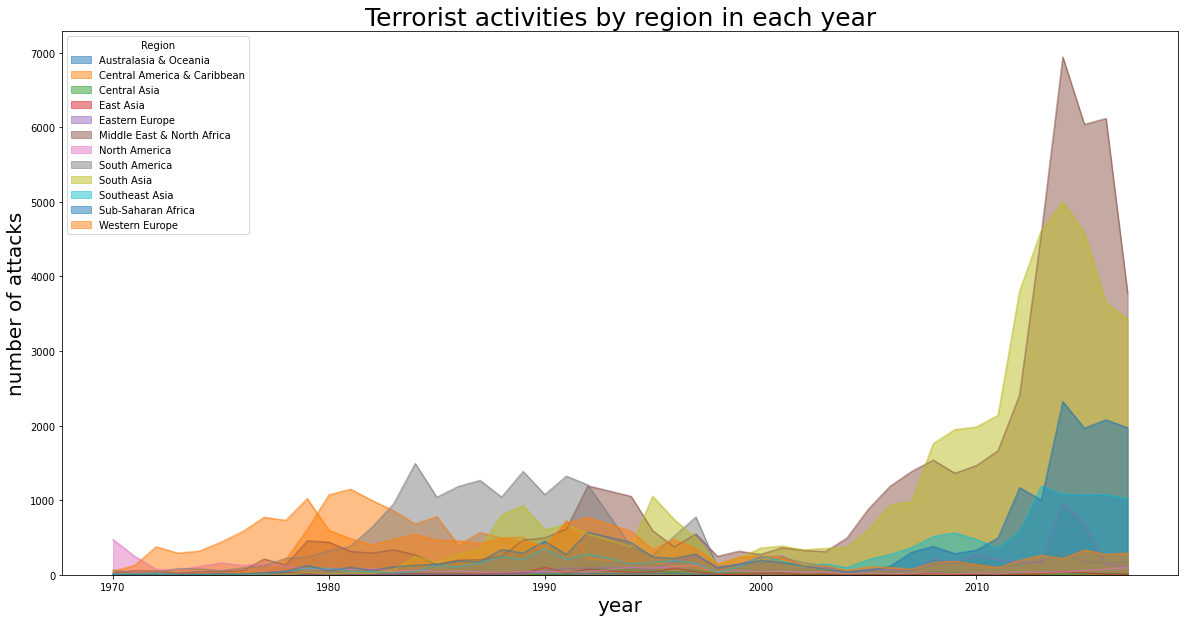

In [118]:
pd.crosstab(gtr.year,gtr.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist activities by region in each year',fontsize=25)
plt.ylabel('number of attacks',fontsize=20)
plt.xlabel('year',fontsize=20)
plt.show()

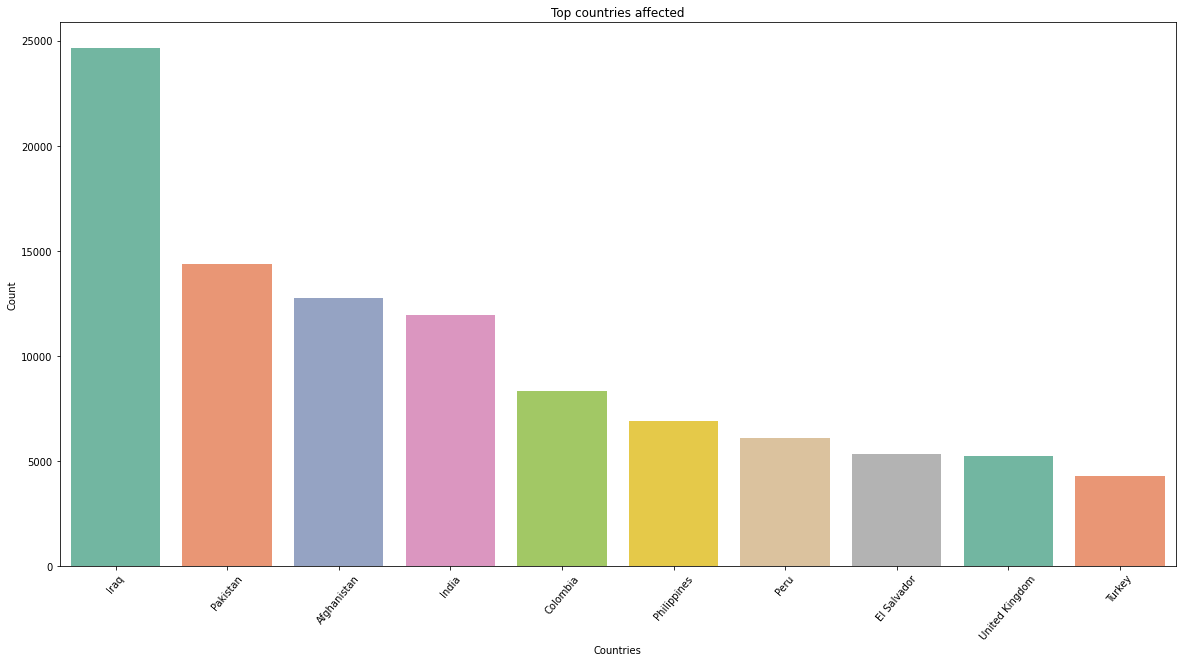

In [119]:
plt.subplots(figsize=(20,10))
sns.barplot(gtr['Country'].value_counts()[:10].index,gtr['Country'].value_counts()[:10].values,palette="Set2")
plt.title("Top countries affected")
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()

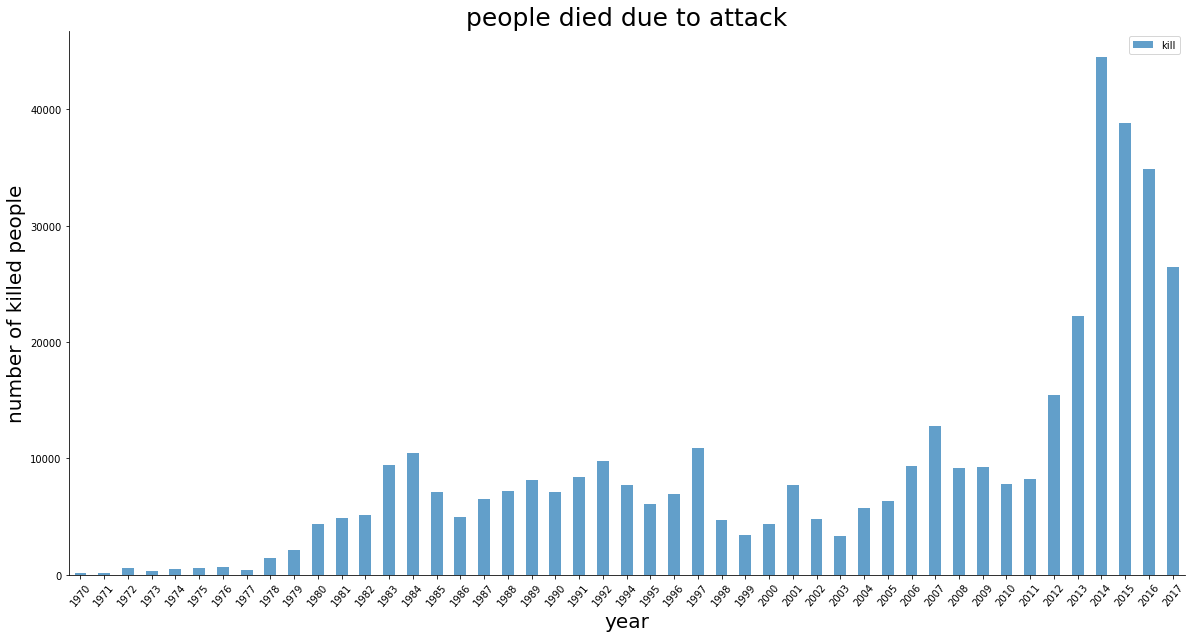

In [122]:
df=gtr[['year','kill']].groupby(['year']).sum()
fig, ax4=plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation=50)
plt.title("people died due to attack",fontsize=25)
plt.ylabel("number of killed people",fontsize=20)
plt.xlabel("year",fontsize=20)
top_side=ax4.spines["top"]
top_side.set_visible(False)
right_side=ax4.spines["right"]
right_side.set_visible(False)


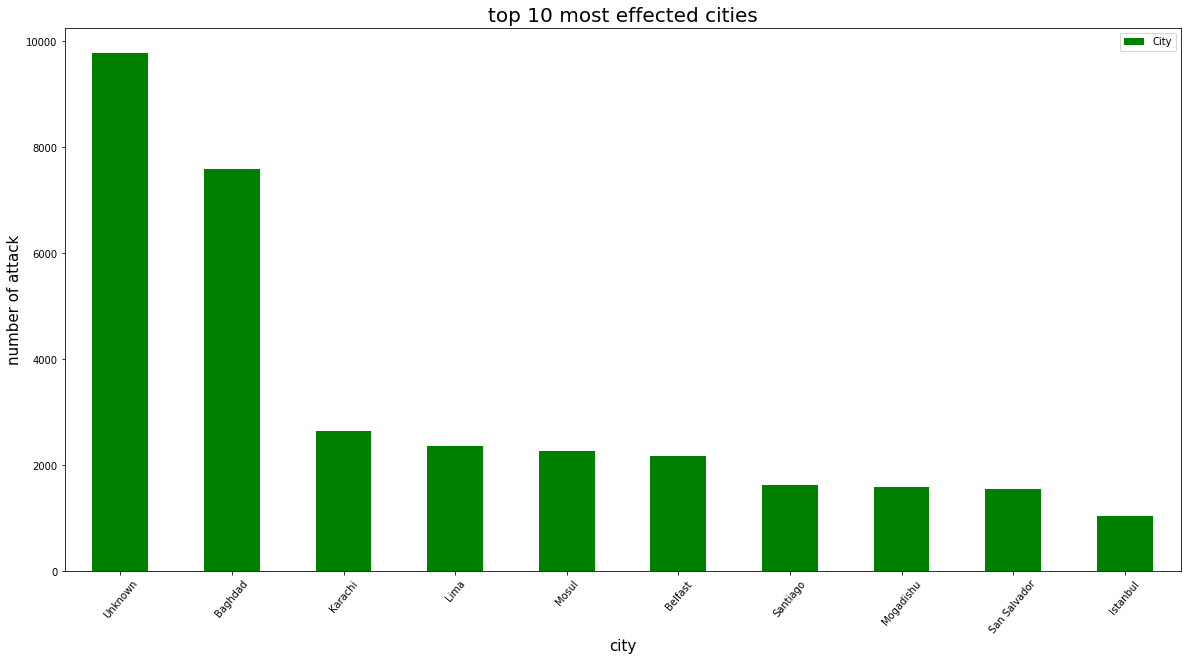

In [124]:
gtr['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='green')
plt.xticks(rotation=50)
plt.xlabel("city",fontsize=15)
plt.ylabel("number of attack",fontsize=15)
plt.title("top 10 most effected cities",fontsize=20)
plt.show()

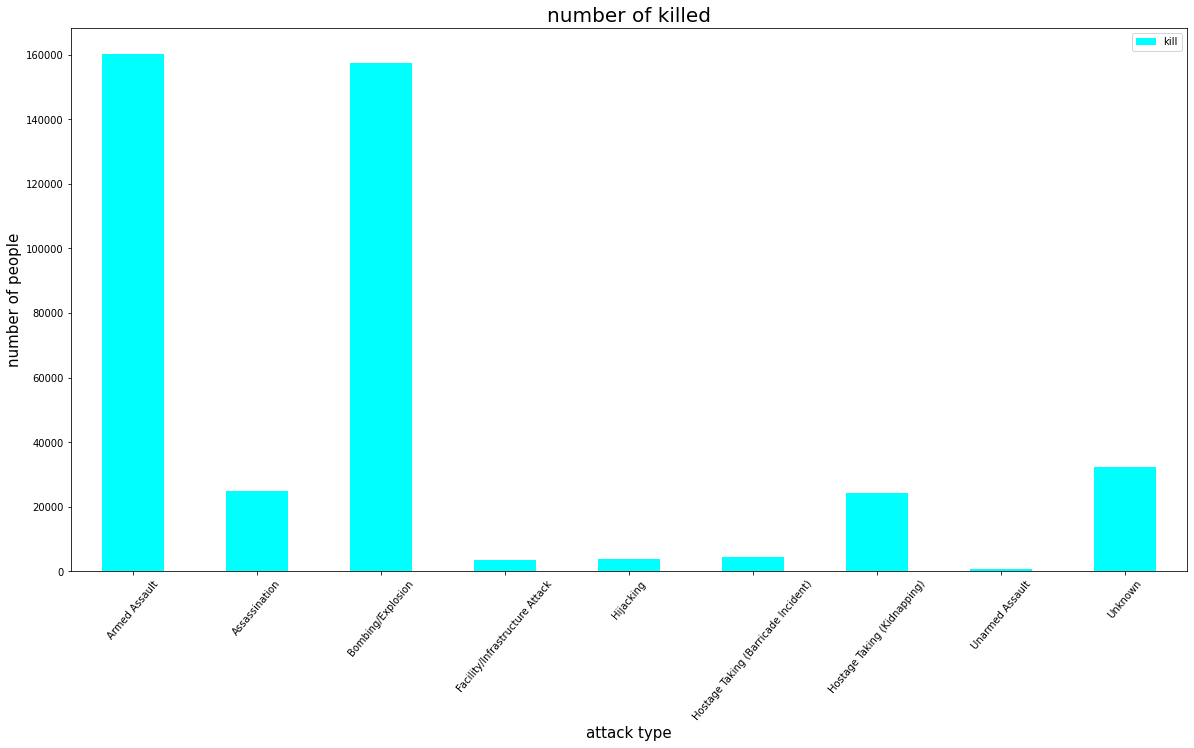

In [126]:
gtr[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color="cyan")
plt.xticks(rotation=50)
plt.title("number of killed",fontsize=20)
plt.ylabel("number of people",fontsize=15)
plt.xlabel("attack type",fontsize=15)
plt.show()

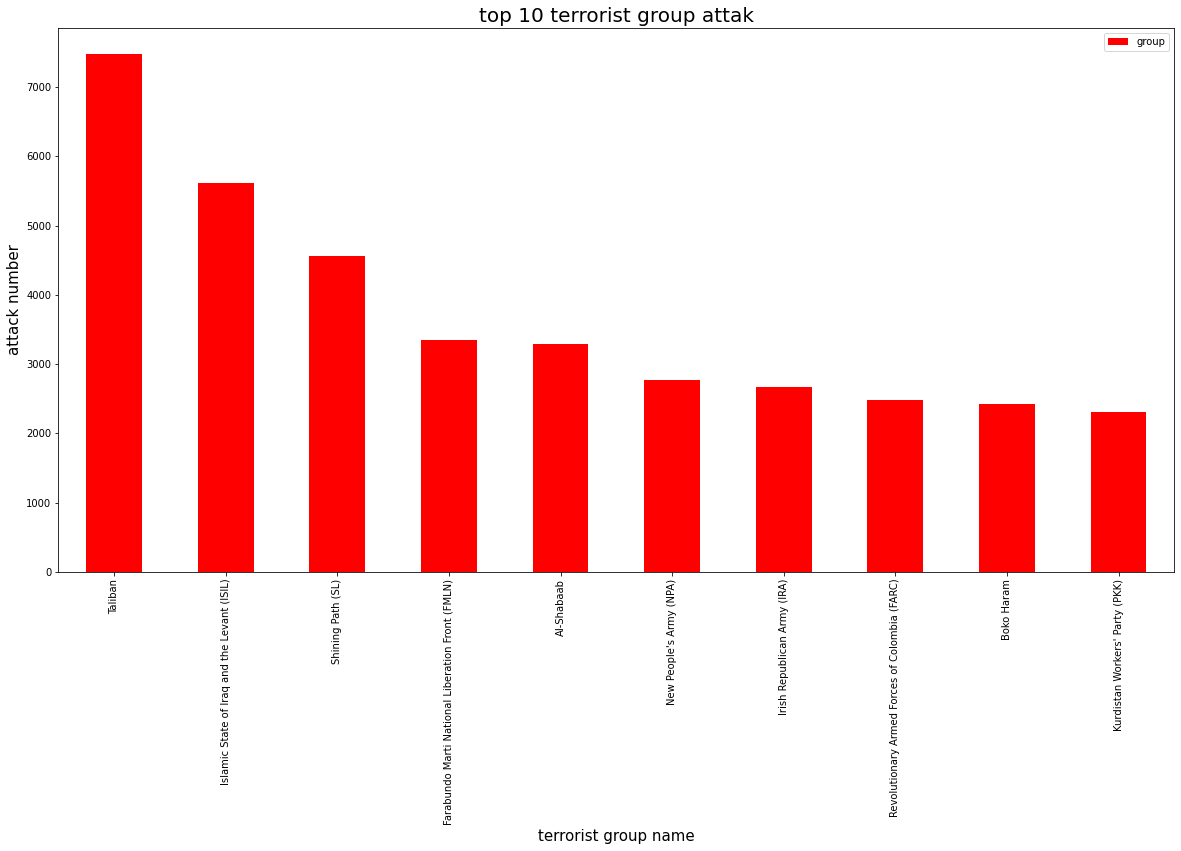

In [128]:
gtr['group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='red',figsize=(20,10))
plt.title("top 10 terrorist group attak",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("attack number",fontsize=15)
plt.show()

In [129]:
df=gtr[['group','Country','kill']]
df=df.groupby(['group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


# CONCLUSION

### IRAQ IS THE MOST ATTACKED COUNTRY.
### MOST ATTACKED CITY IS BAGHDAD WHICH IS IN THE COUNTRY IRAQ.
### 2014 IS THE YEAR WHERE MOST ATTACKS TOOK PLACE.
### TALIBAN IS THE GROUP WITH MOST ATTACKS.

## THANK YOU